In [1]:
from collections import namedtuple, deque
import os
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:

!pip install "gym[all]"  > /dev/null 2>&1 
!pip install "gym[box2d]"  > /dev/null 2>&1 
!pip install box2d-py > /dev/null 2>&1 

!apt-get install x11-utils > /dev/null 2>&1 
!pip install pyglet > /dev/null 2>&1 
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

!pip install pyvirtualdisplay > /dev/null 2>&1

!pip install plotly > /dev/null 2>&1
!pip install --upgrade ceia-soccer-twos > /dev/null 2>&1

In [3]:
DRIVE_PATH = "/content/gdrive/My\ Drive/minicurso_rl/lab02"
DRIVE_PYTHON_PATH = DRIVE_PATH.replace("\\", "")
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

SYM_PATH = "/content/minicurso_rl"
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [4]:
! wget http://www.atarimania.com/roms/Roms.rar
! mkdir /content/ROM/
! unrar e /content/Roms.rar /content/ROM/ -y
! python -m atari_py.import_roms /content/ROM/ > /dev/null 2>&1

--2021-10-23 15:19:58--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 195.154.81.199
Connecting to www.atarimania.com (www.atarimania.com)|195.154.81.199|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11128004 (11M) [application/x-rar-compressed]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  10.61M   479KB/s    in 23s     

2021-10-23 15:20:22 (465 KB/s) - ‘Roms.rar’ saved [11128004/11128004]


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/HC ROMS.zip                                      36%  OK 
Extracting  /content/ROM/ROMS.zip                                         74% 99%  OK 
All OK


In [5]:
import random
import numpy as np
import torch
from torch import nn


torch.manual_seed(10)
random.seed(10)
np.random.seed(10)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:

import gym

def query_environment(name):
    
  env = gym.make(name)
  spec = gym.spec(name)

  print(f"Action Space: {env.action_space}")
  print(f"Observation Space: {env.observation_space}")
  print(f"Max Episode Steps: {spec.max_episode_steps}")
  print(f"Nondeterministic: {spec.nondeterministic}")
  print(f"Reward Range: {env.reward_range}")
  print(f"Reward Threshold: {spec.reward_threshold}")

In [7]:
query_environment("MountainCar-v0")

Action Space: Discrete(3)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: -110.0


In [8]:
query_environment("CartPole-v1")

Action Space: Discrete(2)
Observation Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Max Episode Steps: 500
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: 475.0


In [9]:
query_environment("MountainCarContinuous-v0")

Action Space: Box([-1.], [1.], (1,), float32)
Observation Space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Max Episode Steps: 999
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: 90.0


In [10]:
query_environment("Breakout-v0")

Action Space: Discrete(4)
Observation Space: Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255

In [11]:

query_environment("Breakout-ram-v0")

Action Space: Discrete(4)
Observation Space: Box([0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255], (128,), uint8)
Max Episode Steps: 10000
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: None


In [12]:
env = gym.make("Breakout-v0") # tente para ambientes diferentes
observation = env.reset()

for t in range(3):
    print("\n----------")
    print("Observation: ", observation)
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print("Next Observation: ", observation)
    print("Reward: ", reward)
    print("Done: ", done)
    print("Info: ", info)
    if done:
        print("Finished after {} timesteps".format(t+1))
        break


----------
Observation:  [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Next Observation:  [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
Reward:  0.0
Done:  False
Info:  {'ale.lives': 5}

----------
Observation:  [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 

In [13]:
# Procedimento para renderizar o ambiente 

from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)

In [14]:
import gym

In [15]:
environment_id = "Taxi-v3"
env = gym.make(environment_id)

In [16]:
query_environment(environment_id)

Action Space: Discrete(6)
Observation Space: Discrete(500)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: 8


In [17]:
frames = []
episodes = 1
for episode in range(1, episodes+1):
    obs = env.reset()     # Retorna a observação inicial
    done = False
    score = 0
    while not done:
        action = env.action_space.sample()            # Seleciona uma ação aleatória
        obs, reward, done, info = env.step(action)    # Executa a ação selecionada
        score += reward

        frames.append({
            "frame": env.render(mode="ansi"),
            "state": obs,
            "action": action,
            "reward": reward
            }
        )
    print("\n\nEpisódio: {} Pontuação: {}".format(episode,score))
env.close()



Episódio: 1 Pontuação: -722


In [18]:
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y|_: |B: |
+---------+
  (West)

Timestep: 200
State: 437
Action: 3
Reward: -1


In [19]:
q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        q[(s,a)] = 0.0

In [20]:
# HW construa a função update_q_table seguindo a equação mostrada acima
def update_q_table(prev_state, action, reward, nextstate, alpha, gamma):
    max_a = 0
    for i in range(env.action_space.n):
        if(q[nextstate, i] > q[nextstate, max_a]):
            max_a = i
    q[prev_state, action] = (1-alpha) * q[prev_state, action] + alpha*(reward + gamma * q[next_state, max_a])
    
        
    # Calcule max_a Q(next_state, all_actions) procurando na tabela Q quais 
    # ações para o estado next_state possuem o maior valor Q

    # Atualize a tabela Q na posição (prev_state, action) conforme a regra de atualização
    # (1-alpha) * Q(prev_state, action) + alpha(reward + gamma * max_a Q(next_state, all_actions))

In [21]:
import random
# HW construa a função epsilon_greedy_policy seguindo a descrição acima
def epsilon_greedy_policy(state, epsilon):
    if random.uniform(0, 1)<epsilon:
        return env.action_space.sample()
    else:
        max_a = 0
        for i in range(env.action_space.n):
            if(q[state, i] > q[state, max_a]):
                max_a = i
        return max_a
    # Você pode utilizar a função random.uniform para amostrar um valor 
    # aleatório entre 0 e 1. Caso o valor amostrado seja menor do que epsilon
    # retorne uma ação aleatória. Caso contrário retorne a ação que maximiza o 
    # valor Q para o estado state

In [22]:
alpha = 0.7
gamma = 0.6
epsilon = 0.1

In [23]:
from IPython.display import clear_output

epochs = 8000
all_rewards = []
for i in range(epochs):
    r = 0
    done = False

    prev_state = env.reset()
    
    while not done:
        action = epsilon_greedy_policy(prev_state, epsilon)
        # HW: selecione a ação pela política epsilon-greedy
        next_state, reward, done, info = env.step(action)
        # HW: Realize a ação no ambiente e receba o próximo estado, recompensa, done e info
        update_q_table(prev_state, action, reward, next_state, alpha, gamma)
        # HW: Atualize o valor Q usando a função update_q_table        
        prev_state = next_state
        # HW: Atualize o estado anterior como próximo estado

        # Armazene todas as recompensas obtidas
        r += reward

    all_rewards.append(r)

    if i % 10 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")
        print("total reward: ", r)

env.close()

Episode: 7990
total reward:  6


In [24]:
import plotly.graph_objs as go

fig = go.Figure([
    go.Scatter(
        y=all_rewards,
        x=[ep for ep in range(1, epochs + 1)],
        mode="lines",
        name="Recompensa"
    ),
])
fig.update_layout(
    title="Recompensa por episódio",
    yaxis = dict(
        title = "Recompensa"
    ),
    xaxis = dict(
        title = "Episódio",
    )
)
fig.show()

In [25]:
import pickle

In [26]:
# Salva os dados (Tabela Q)
pickle.dump(q, open("q_table.pkl", "wb"))

del q

In [27]:
q = pickle.load(open("q_table.pkl", "rb"))

In [28]:
frames = []
episodes = 1
done = False
for episode in range(1, episodes+1):
    r = 0
    prev_state = env.reset()

    while not done:
        action = max(list(range(env.action_space.n)), key = lambda x: q[(prev_state,x)])
        next_state, reward, done, _ = env.step(action)    

        r += reward

        frames.append({
            "frame": env.render(mode="ansi"),
            "state": prev_state,
            "action": action,
            "reward": reward
            }
        )

        prev_state = next_state

    print("\n\nEpisódio: {} Pontuação: {}".format(episode,r))



Episódio: 1 Pontuação: 3


In [29]:
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 18
State: 418
Action: 5
Reward: 20


In [30]:
del q

In [31]:
# Procedimento para renderizar o ambiente no Google Colab

from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()


from matplotlib import pyplot as plt, animation
%matplotlib inline
from IPython import display

def create_anim(frames, dpi, fps):
    plt.figure(figsize=(frames[0].shape[1] / dpi, frames[0].shape[0] / dpi), dpi=dpi)
    patch = plt.imshow(frames[0])
    def setup():
        plt.axis('off')
    def animate(i):
        patch.set_data(frames[i])
    anim = animation.FuncAnimation(plt.gcf(), animate, init_func=setup, frames=len(frames), interval=fps)
    return anim

def display_anim(frames, dpi=72, fps=60):
    anim = create_anim(frames, dpi, fps)
    return anim.to_jshtml()

def save_anim(frames, filename, dpi=72, fps=50):
    anim = create_anim(frames, dpi, fps)
    anim.save(filename)

In [32]:
import gym

environment_id = "LunarLander-v2"       # Nome do ambiente utilizado
env = gym.make(environment_id)          # Criando o ambiente

query_environment(environment_id)

Action Space: Discrete(4)
Observation Space: Box([-inf -inf -inf -inf -inf -inf -inf -inf], [inf inf inf inf inf inf inf inf], (8,), float32)
Max Episode Steps: 1000
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: 200




Episódio: 1 Pontuação: -318.28060237383863


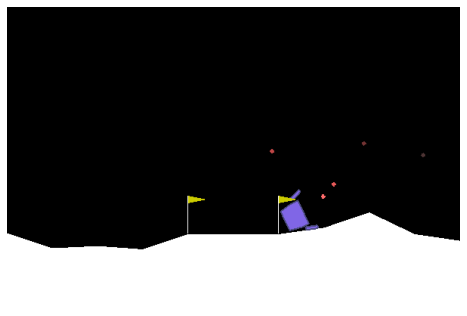

In [33]:
frames = []
episodes = 1
for episode in range(1, episodes+1):
    obs = env.reset()     # Retorna a observação inicial
    done = False
    score = 0
    while not done:
        frames.append(env.render(mode='rgb_array'))     # Renderizando o ambiente
        action = env.action_space.sample()              # Seleciona uma ação aleatória
        obs, reward, done, info = env.step(action)      # Executa a ação selecionada
        score += reward
    print("\n\nEpisódio: {} Pontuação: {}".format(episode,score))
env.close()

display.HTML(display_anim(frames))

In [34]:

class ReplayBuffer:
    def __init__(self, buffer_size, batch_size, seed):
        """
        Replay memory permite que o agente registre experiências e aprenda 
        com elas.
        
        Parametros
        ---------
        buffer_size (int): tamanho máximo da memória interna
        batch_size (int): tamanho do batch que será amostrado durante o treino
        seed (int): random seed
        """

        self.batch_size = batch_size
        self.seed = random.seed(seed)
        self.memory = deque(maxlen=buffer_size)
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
    
    def add(self, state, action, reward, next_state, done):
        """Adicionar experiência"""
        experience = self.experience(state, action, reward, next_state, done)
        self.memory.append(experience)
                
    def sample(self):
        """ 
        Amostrar aleatoriamente e retornar a tupla (estado, ação, recompensa, 
        próximo_estado, concluído) como torch tensors
        """
        experiences = random.sample(self.memory, k=self.batch_size)
        
        # Converter em torch tensors
        states = torch.from_numpy(np.vstack([experience.state for experience in experiences if experience is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([experience.action for experience in experiences if experience is not None])).long().to(device)        
        rewards = torch.from_numpy(np.vstack([experience.reward for experience in experiences if experience is not None])).float().to(device)        
        next_states = torch.from_numpy(np.vstack([experience.next_state for experience in experiences if experience is not None])).float().to(device)  
        
        # Converter done de boolean para int
        dones = torch.from_numpy(np.vstack([experience.done for experience in experiences if experience is not None]).astype(np.uint8)).float().to(device)        
        
        return (states, actions, rewards, next_states, dones)
        
    def __len__(self):
        return len(self.memory)

In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, seed):
        """
        Construa uma rede neural fully connected
        
        Parameters
        ----------
        state_size (int): Dimensão do estado
        action_size (int): Dimensão da ação
        seed (int): random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, action_size)  
        
    def forward(self, x):
        """Forward pass"""
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [61]:
class DQNAgent:
    def __init__(self, state_size, action_size, seed):
        """
        O Agente DQN interage com o ambiente, 
        armazena a experiência e aprende com ela
        
        Parametros
        ----------
        state_size (int): Dimensão do estado
        action_size (int): Dimensão da ação
        seed (int): random seed
        """

        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)

        # Inicializar redes Q 
        self.q_network = QNetwork(state_size, action_size, seed).to(device)
        self.fixed_network = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=LR)

        # Inicializar memória
        self.memory = ReplayBuffer(BUFFER_SIZE, BATCH_SIZE, seed)
        self.timestep = 0


    # HW defina a função de loss
    def criterion(self, predicted, target) -> torch.tensor:
        return F.mse_loss(predicted, target)
        """
        Calcula o erro quadrático médio entre o valor predito e o valor alvo

        Parametros
        ----------
        predicted (torch.tensor): valor predito
        target (torch.tensor): valor alvo

        -> torch.Te
        """
        # raise NotImplementedError   
        
          
    
    def step(self, state, action, reward, next_state, done):
        """
        Atualiza o conhecimento do Agente
        
        Parametros
        ----------
        state (array_like): Estado atual do ambiente
        action (int): Ação realizada no estado atual
        reward (float): Recompensa recebida após a ação
        next_state (array_like): Próximo estado retornado pelo ambiente após a ação
        done (bool): se o episódio terminou após a ação
        """

        # Salva transição no replay buffer
        self.memory.add(state, action, reward, next_state, done)
        self.timestep += 1

        # Realiza o aprendizado do agente a cada UPDATE_EVERY steps
        if self.timestep % UPDATE_EVERY == 0:
            if len(self.memory) > BATCH_SIZE:
                sampled_experiences = self.memory.sample()
                loss = self.learn(sampled_experiences)

                return loss
        return None
        
    def learn(self, experiences):
        """
        Aprende com a experiência treinando a q_network
        
        Parametros
        ----------
        experiences (array_like): Lista de experiências amostradas da memória do agente
        """
        states, actions, rewards, next_states, dones = experiences

        # Obtenha a ação com valor máximo de Q
        action_values = self.fixed_network(next_states).detach()

        # Notas
        # tensor.max(1)[0] retorna os valores, tensor.max(1)[1] retorna os índices
        # operação unsqueeze --> np.reshape
        # Aqui nós fazemos torch.Size([64]) -> torch.Size([64, 1])
        # O valor obtido será correspondente a max_a Q(S', a)
        max_action_values = action_values.max(1)[0].unsqueeze(1)

        # HW Defina o Q_target (Q*) com valores de ação com desconto para todas
        # as transições não finais (done == 0). Para as transições finais (done == 1)
        # Q(S', a) é 0, portanto utilize a recompensa diretamente.
        # Q*(S, A) <- r + γ max_a Q(S', a)
        if done==0:
            Q_target = rewards + gamma*max_action_values
        else:
            Q_target = rewards


        # Calcula Q(s_t, a) - o modelo calcula Q (s_t), então selecionamos as 
        # colunas de ações tomadas. Estas são as ações que teriam sido tomadas 
        # para cada estado do batch de acordo com a rede Q
        Q_predicted = self.q_network(states).gather(1, actions)
        
        # HW Calcula a loss
        loss = self.criterion(Q_predicted, Q_target)
        # HW zerar os gradientes
        self.optimizer.zero_grad()
        # HW calcula os novos gradientes (backward pass)
        loss.backward()
        # HW atualiza os pesos com o otimizador
        self.optimizer.step()
        # Atualizar pesos da rede Q fixa
        self.update_fixed_network(self.q_network, self.fixed_network)

        return loss.detach().cpu().numpy()
        
    def update_fixed_network(self, q_network, fixed_network):
        """
        Atualize a rede fixa copiando os pesos da rede Q usando o parâmetro TAU
        
        Parametros
        ----------
        q_network (PyTorch model): Q network
        fixed_network (PyTorch model): target network fixa
        """
        for source_parameters, target_parameters in zip(q_network.parameters(), fixed_network.parameters()):
            target_parameters.data.copy_(TAU * source_parameters.data + (1.0 - TAU) * target_parameters.data)
        
        
    def act(self, state, eps=0.0):
        """
        Escolha a ação
        
        Parametros
        ----------
        state (array_like): estado atual do ambiente
        eps (float): epsilon para seleção epsilon-greedy de ação
        """
        rnd = random.random()

        if rnd < eps:
            return np.random.randint(self.action_size)
        else:
            # Seleciona a melhor ação com probabilidade 1 - eps
            state = torch.from_numpy(state).float().unsqueeze(0).to(device)
            # coloque a rede em modo de avaliação
            self.q_network.eval()
            with torch.no_grad():
                action_values = self.q_network(state)

            # Voltar ao modo de treino
            self.q_network.train()
            action = np.argmax(action_values.cpu().data.numpy())
            return action    
        
    def checkpoint(self, filename):
        torch.save(self.q_network.state_dict(), filename)

    def load_model(self, filename):
        self.q_network.load_state_dict(torch.load(filename))
        self.fixed_network.load_state_dict(torch.load(filename))

In [62]:
BUFFER_SIZE = int(1e5)  # Tamanho do Replay Buffer
BATCH_SIZE = 64         # Número de experiências para amostrar da memória
GAMMA = 0.99            # Fator de desconto
TAU = 1e-3              # Parâmetro de atualização suave para atualização de rede Q fixa
LR = 1e-4               # Taxa de aprendizagem
UPDATE_EVERY = 4        # Com que frequência atualizar a rede Q 

MAX_EPISODES = 3000  # Número máximo de episódios para jogar
MAX_STEPS = 1000     # passos máximos permitidos em um único episódio / jogo
ENV_SOLVED = 200     # Pontuação MAX em que consideramos o ambiente ser resolvido
PRINT_EVERY = 100    # Com que freqüência imprimir o progresso

# Epsilon 
EPS_START = 1.0      # Valor padrão / inicial de eps
EPS_DECAY = 0.999    # Taxa de decaimento do épsilon
EPS_MIN = 0.01       # Épsilon mínimo

In [63]:

EPS_DECAY_RATES = [0.9, 0.99, 0.999, 0.9999]
plt.figure(figsize=(10,6))

fig = go.Figure([])

_eps_list = []
for decay_rate in EPS_DECAY_RATES:
    test_eps = EPS_START
    eps_list = []
    for _ in range(MAX_EPISODES):
        test_eps = max(test_eps * decay_rate, EPS_MIN)
        eps_list.append(test_eps)          
    
    _eps_list.append(eps_list)


fig = go.Figure([
    go.Scatter(
        y=_eps_list[0],
        x=[ep for ep in range(1, len(eps_list) + 1)],
        mode="lines",
        name=EPS_DECAY_RATES[0]
    ),
    go.Scatter(
        y=_eps_list[1],
        x=[ep for ep in range(1, len(eps_list) + 1)],
        mode="lines",
        name=EPS_DECAY_RATES[1]
    ),
    go.Scatter(
        y=_eps_list[2],
        x=[ep for ep in range(1, len(eps_list) + 1)],
        mode="lines",
        name=EPS_DECAY_RATES[2]
    ),
    go.Scatter(
        y=_eps_list[3],
        x=[ep for ep in range(1, len(eps_list) + 1)],
        mode="lines",
        name=EPS_DECAY_RATES[3]
    ),
])
fig.update_layout(
    title="Efeito de várias taxas de decaimento",
    xaxis = dict(title="# Episódios"),
    yaxis = dict(title="Epsilon")
)
fig.show()

<Figure size 720x432 with 0 Axes>

In [64]:
# Obtem tamanhos de estado e ação
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

print("Tamanho do estado: {}, tamanho da ação: {}".format(state_size, action_size))

Tamanho do estado: 8, tamanho da ação: 4


In [65]:
dqn_agent = DQNAgent(state_size, action_size, seed=0)

In [66]:
from time import time

start = time()
scores = []
loss = []

# Mantem uma lista das últimas 100 pontuações
scores_window = deque(maxlen=100)
eps = EPS_START
for episode in range(1, MAX_EPISODES + 1):
    score = 0

    # HW inicialize o ambiente e pegue a primeira observação
    env = gym.make('LunarLander-v2')
    obs = env.reset()
    for t in range(MAX_STEPS):
        # HW: Peça para o agente (dqn_agent) escolher uma ação dado a observação e 
        # um epsilon eps
        action = dqn_agent.act(obs, eps)

        # HW: Realize a ação no ambiente e receba o próximo estado, recompensa, done e info
        next_obs, reward, done, info = env.step(action)

        # HW: Dado o estado, ação, recompensa, próximo_estado e done obtidos, 
        # atualize o conhecimento do agente, e guarde a _loss retornada para 
        # futuros logs
        
        _loss = dqn_agent.step(obs, action, reward, next_obs, done)

        # HW: Atualize o estado anterior como próximo estado      
        obs = next_obs


        score += reward        
        if done:
            break

        if _loss is not None:
            loss.append(_loss)
            
        eps = max(eps * EPS_DECAY, EPS_MIN)
        if episode % PRINT_EVERY == 0:
            mean_score = np.mean(scores_window)
            print("\r Progresso {}/{}, pontuação média:{:.2f}".format(episode, MAX_EPISODES, mean_score), end="")
        if score >= ENV_SOLVED:
            mean_score = np.mean(scores_window)
            print("\rAmbiente resolvido em {} episódios, pontuação média: {:.2f}".format(episode, mean_score), end="")
            sys.stdout.flush()
            dqn_agent.checkpoint("minicurso_rl/lab02/solved_dqn_ckpt.pth")
            break
            
    scores_window.append(score)
    scores.append(score)
    
end = time()    
print("{} segundos".format(end - start))

 Progresso 3000/3000, pontuação média:-136.32205.02977657318115 segundos


In [68]:
dqn_agent.checkpoint("last_dqn_ckpt.pth")

In [69]:
fig = go.Figure([
    go.Scatter(
        y=scores,
        x=[ep for ep in range(1, len(scores) + 1)],
        mode="lines",
        name="Recompensa"
    ),
])
fig.update_layout(
    title="Recompensa",
    xaxis = dict(title="Episódios")
)
fig.show()

In [70]:
fig = go.Figure([
    go.Scatter(
        y=loss,
        x=[ep for ep in range(1, len(loss) + 1)],
        mode="lines",
        name="Loss"
    ),
])
fig.update_layout(
    title="Loss",
    xaxis = dict(title="Episódio")
)
fig.show()

In [73]:

dqn_agent = DQNAgent(state_size, action_size, seed=0)
dqn_agent.load_model("last_dqn_ckpt.pth")

In [74]:

frames = []
episodes = 1
for episode in range(1, episodes+1):
    obs = env.reset()     
    done = False
    score = 0
    while not done:
        frames.append(env.render(mode='rgb_array'))     
        action = dqn_agent.act(obs, 0)
        obs, reward, done, info = env.step(action)      
        score += reward
    print("\n\nEpisódio: {} Pontuação: {}".format(episode,score))
env.close()



Episódio: 1 Pontuação: -142.0610489995894


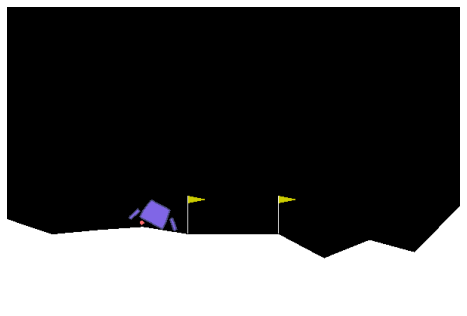

In [75]:

display.HTML(display_anim(frames))